# Introduction to Natural Language Processing: Assignment 2

In this exercise we'll practice features extraction using Tf-Idf and SpaCy as well as multiclass text classification using the word embedding technique.

- You can use built-in Python packages, spaCy, scikit-learn, Numpy and Pandas.
- Please comment your code
- Submissions are due Tuesdays at 23:59 **only** on eCampus: **Assignmnets >> Student Submissions >> Assignment 3 (Deadline: 12.11.2024, at 23:59)**

- Name the file aproppriately: "Assignment_2_\<Your_Name\>.ipynb" and submit only the Jupyter Notebook file.
- If you are working in a group of two, please have the names of both of the members in the file name.
- Please use relative path, your code should work on my computer if the Jupyter Notebook and the file are both in the same directory.

Example: file_name = bbc-news.csv, **DON'T use:** /Users/ComputerName/Username/Documents/.../bbc-news.csv

### Task 1 (2 points)

Write a function `extract_proper_nouns(my_file_name)` that takes a file name (my_file_name.txt) as input and returns a list containing all proper nouns with more than one token.

**Example:**

text = "Honk Kong and Japan are two countries in Asia and New York is the largest city in the world"

return = `["New York", "Hong Kong"]` **(Note: it should not return "Japan")**

In [5]:
import spacy

In [9]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
nlp = spacy.load("en_core_web_sm")
def extract_proper_nouns(my_file_name):
    several_token_propn = []
    # here comes your code

    with open(my_file_name, 'r') as file:
        text = file.read()

    #Processing the code
    doc = nlp(text)
    for entity in doc.ents:
      #If the entities in doc are Geopolitical and their tokens are larger than 1 add it to our list
        if entity.label_ == "GPE" and len (entity.text.split()) > 1:
            several_token_propn.append(entity.text)

    return(several_token_propn)

### Task 2 (3 points)

Write a function `common_lemma(my_file_name)` that takes a file name (my_file_name.txt) as input and returns a Python dictionary with lemmas as `key` and the `value` that should contain a list with both verbs and nouns sharing the same lemma.

**Examples:**

1.
text = "When users google for a word or any query, their system internally runs a pipeline in order to process what the person is querying."

return = `{"query": ["query", "querying"]}`

2.
text = I really loved the movie and show, the movie was showing reality but it showed sometimes nonesense!

return = `{"show": ["show", "showing", "showed"]}` **(Note: it should not return "movie" because both "movie"s are NOUN)**

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")

def common_lemma(my_file_name):
    lemma_dict = {}

    with open(my_file_name, 'r') as file:
        text = file.read()


    doc = nlp(text)

    for token in doc:
            # Check if the token is either a noun or a verb
            if token.pos_ in {"NOUN", "VERB"}:
                lemma = token.lemma_

                # Initialize the lemma entry if not present
                if lemma not in lemma_dict:
                    lemma_dict[lemma] = {"tokens": set(), "noun": False, "verb": False}

                # Add the token's text to the tokens set
                lemma_dict[lemma]["tokens"].add(token.text)

                # Set flags for whether this lemma has noun or verb forms
                if token.pos_ == "NOUN":
                    lemma_dict[lemma]["noun"] = True
                elif token.pos_ == "VERB":
                    lemma_dict[lemma]["verb"] = True

        # Filter lemmas that have both noun and verb forms
    result = {lemma: list(data["tokens"]) for lemma, data in lemma_dict.items() if data["noun"] and data["verb"]}

    return result




### Task 3 (1 point)

Load the data `bbc-text.csv`; This datata consists of 2225 documents from the BBC news website corresponding to stories from 2004-2005.

In [12]:
# Here comes your code
import pandas as pd
file_path = 'bbc-news.csv'
data = pd.read_csv(file_path)

In [13]:
print(data.head())

        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...


In [14]:
print(data)

           category                                               text
0              tech  tv future in the hands of viewers with home th...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary of farrell  gamble  leicester say ...
3             sport  yeading face newcastle in fa cup premiership s...
4     entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       business  cars pull down us retail figures us retail sal...
2221       politics  kilroy unveils immigration policy ex-chatshow ...
2222  entertainment  rem announce new glasgow concert us band rem h...
2223       politics  how political squabbles snowball it s become c...
2224          sport  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]


### Task 4 (1 point)

Show how many articles we have for each topical area (class label) in the dataset using a plot.

/var/folders/l4/jfvbkqp14fd8m7dlf36rj__r0000gn/T/ipykernel_3003/3555837114.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


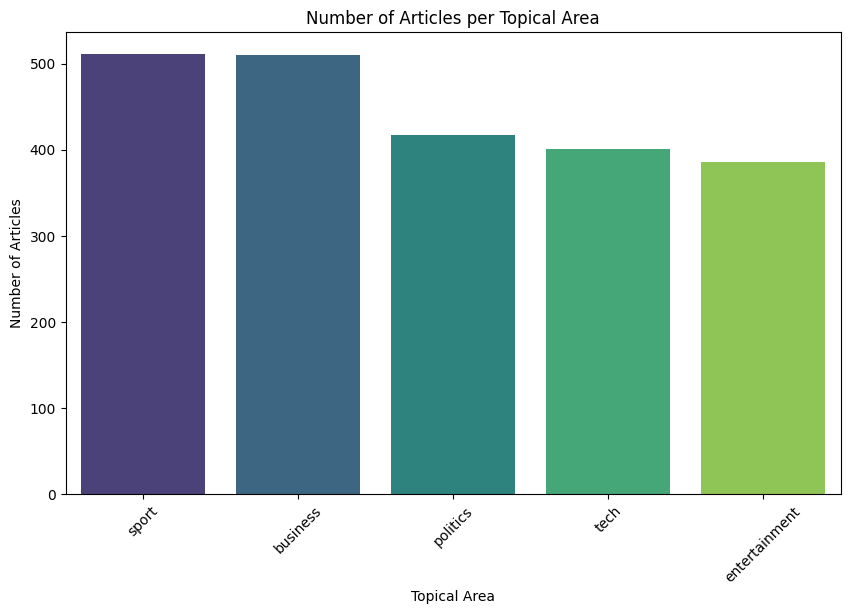

In [16]:
category_counts = data['category'].value_counts()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Number of Articles per Topical Area')
plt.xlabel('Topical Area')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

### Task 5 (2 point)

Preprocessing: Define two following functions and apply them to the dataset:
1. Remove punctuation
2. Remove any numbers

In [17]:
import re
def remove_punctuation(corpus):

    cleaned_corpus = re.sub(r'[^\w\s]', '', corpus)
    return(cleaned_corpus)

def remove_numbers(corpus):
    # Here comes your code
    cleaned_corpus = re.sub(r'\d+', '', corpus)
    return(cleaned_corpus)

data['text'] = data['text'].apply(remove_punctuation).apply(remove_numbers)


In [18]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


### Task 6.1 (1 points)

Split the data into training and test set (70% and 30%) using scikit-learn, shuffle it, and set the `seed=101 (random_state)`.

**NOTE:** If working with this dataset is not computationaly possible for you, you can work only with a subset of the dataset (i.e., the first 1000 rows) and use only the first 150 tokens for each article. You should point this out in your code.

In [20]:
from sklearn.model_selection import train_test_split
# data = data.head(1000)
# def limit_tokens(text, max_tokens=150):
#     tokens = text.split()  # Split the text into tokens
#     return ' '.join(tokens[:max_tokens])  # Join the first 150 tokens
# data['text'] = data['text'].apply(lambda x: limit_tokens(x, 150))
X = data['text']
y = data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(X_train.head())


Training set size: 1557
Test set size: 668
920     oscar nominees lack pulling power this year s ...
1500    smartphones suffer skulls attack owners of som...
1711    souness backs smith for scotland graeme sounes...
1978    venezuela reviews foreign deals venezuela is t...
1125    parmalat founder offers apology the founder an...
Name: text, dtype: object


### Task 6.2 (3 points)

### **Training models on TF-IDF vectors:**

a) Convert each article in your data splits to a vector representation using the tf-idf-vectorizer.

b) Using the vectors from the previous step, train the `MLPClassifier` and another model of your choice from the scikit-learn library.

c) Test both of your models on the test set from Task 6.1.

MLPClassifier Results:
               precision    recall  f1-score   support

     business       0.98      0.99      0.98       155
entertainment       0.98      0.97      0.97       117
     politics       0.98      0.99      0.98       122
        sport       0.99      0.99      0.99       153
         tech       0.99      0.98      0.98       121

     accuracy                           0.98       668
    macro avg       0.98      0.98      0.98       668
 weighted avg       0.98      0.98      0.98       668



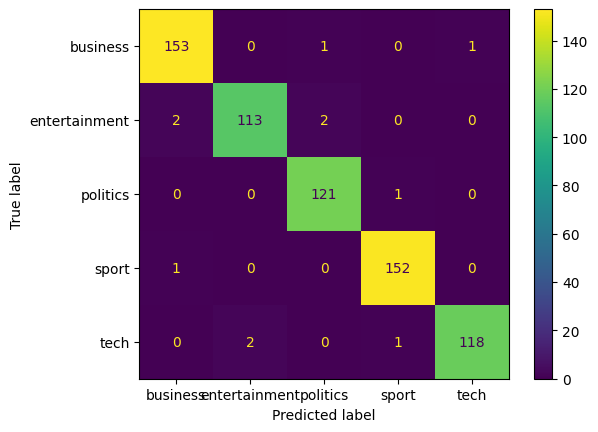

Accuracy: 0.9835329341317365

RandomForestClassifier Results:
               precision    recall  f1-score   support

     business       0.94      0.96      0.95       155
entertainment       0.98      0.91      0.94       117
     politics       0.94      0.96      0.95       122
        sport       0.96      0.99      0.98       153
         tech       0.97      0.97      0.97       121

     accuracy                           0.96       668
    macro avg       0.96      0.96      0.96       668
 weighted avg       0.96      0.96      0.96       668



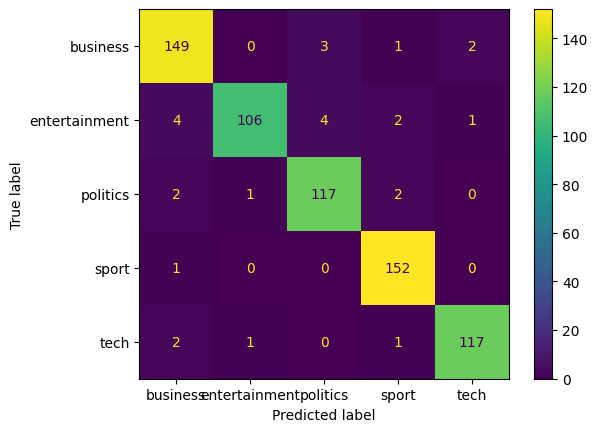

Accuracy: 0.9595808383233533


In [25]:
# Here comes your code
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import metrics
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=101)
mlp.fit(X_train_tfidf, y_train)
y_pred_MLP_tfidf = mlp.predict(X_test_tfidf)

#RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=101)
rf.fit(X_train_tfidf, y_train)
y_pred_RF_tfidf = rf.predict(X_test_tfidf)

labels = np.unique(y_test)

print("MLPClassifier Results:")
print(classification_report(y_test, y_pred_MLP_tfidf))
confusion_matrix_mlp_tfidf = confusion_matrix(y_test, y_pred_MLP_tfidf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_mlp_tfidf, display_labels = labels)
cm_display.plot()
plt.show()

print(f"Accuracy: {accuracy_score(y_test, y_pred_MLP_tfidf)}")

print("\nRandomForestClassifier Results:")
print(classification_report(y_test, y_pred_RF_tfidf))
confusion_matrix_RF_tfidf = confusion_matrix(y_test, y_pred_RF_tfidf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_RF_tfidf, display_labels = labels)
cm_display.plot()
plt.show()
print(f"Accuracy: {accuracy_score(y_test, y_pred_RF_tfidf)}")



### Task 6.3 (3 points)

### **Training models on SpaCy model vector representation:**

a) Convert each article in your data splits to a vector representation using the pre-trained spaCy model. (**Hint:** It should be stored as an array)

b) Using the vectors from the previous step, train the `MLPClassifier` and another model of your choice from the scikit-learn library.

c) Test both of your models on the test set from Task 6.1.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import spacy
from sklearn import metrics
import numpy as np

# Load pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")
# Define the function to convert text to a vector using spaCy
def text_to_vector(text):
    doc = nlp(text)
    return doc.vector  # Return the vector representation of the document


# Vectorize the text data using spaCy's pre-trained model
X_train_vectors = X_train.apply(text_to_vector).tolist()
X_test_vectors = X_test.apply(text_to_vector).tolist()

# MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=101)
mlp.fit(X_train_vectors, y_train)
y_pred_MLP = mlp.predict(X_test_vectors)

# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=101)
rf.fit(X_train_vectors, y_train)
y_pred_RF = rf.predict(X_test_vectors)

labels = np.unique(y_test)

print("MLPClassifier Results:")
print(classification_report(y_test, y_pred_MLP))
confusion_matrix_mlp=confusion_matrix(y_test, y_pred_MLP)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_mlp, display_labels = labels)
cm_display.plot()
plt.show()
print(f"Accuracy: {accuracy_score(y_test, y_pred_MLP)}")

print("\nRandomForestClassifier Results:")
print(classification_report(y_test, y_pred_RF))
confusion_matrix_RF = confusion_matrix(y_test, y_pred_RF)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_RF, display_labels = labels)
cm_display.plot()
plt.show()
print(f"Accuracy: {accuracy_score(y_test, y_pred_RF)}")


### Task 7 (4 points)

Using the predictions from the four classifiers, evaluate the models and report accuracy, recall, precision, f1 scores and confusion matrix for each of them. (**Hint:** You should build a confusion matrix for multi-class classification)

In [ ]:
# Here comes your code
#I did this part in previous section


